# SIEVE ANALYSIS OF FINE AND COARSE AGGREGATES

## Introduction

Concrete is a composite material widely used in construction due to its **strength** and **durability**. However, its performance can be influenced by the proportions of its constituents. This notebook presents an investigation into the impact of fine aggregate content on the density and void content of concrete mixes. Understanding these relationships is crucial for optimizing concrete mix design for various structural applications.

This notebook explores the question: How does the proportion of fine aggregate in a concrete mix affect its density and void content? The data collected from various concrete blends with different fine aggregate percentages will be analyzed to determine this relationship.

## Procedure

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Data preparation

In [291]:
# Table 1: Maximum Dry Density of Aggregate Blend
data_table1 = {
    "Determination No.": [1, 2, 3, 4, 5, 6, 7, 8],
    "Percent FA (%)": [0, 30, 40, 50, 60, 70, 80, 100],
    "Weight of FA (kg)": [None, -3.86, 6, 9, 13.5, 21, 36, None],
    "Weight of CA (kg)": [None, 9, 9, 9, 9, 9, 9, None],
    "Wt. of container and blend (kg)  (sample1)": [None, 5.565, 5.615, 5.681, 5.648, None, None, None],
    "Wt. of container and blend (kg)  (sample2)": [None, 5.55, 5.659, 5.687, 5.681, None, None, None],
    "Average Wt. of container and blend (kg)": [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
    "Wt. of blend (kg)": [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
    "Percent Voids (%)": [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],
    "Bulk Dry Density": [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
}
df_table1 = pd.DataFrame(data_table1)
container_weight = 2.187  # kg
container_volume = 1.86e-3  # m³

# Table 2: Specific Gravity and Absorption of Fine Aggregate
data_table2 = {
    "Wt. of SSD sample (g) [S]": 421.5,
    "Wt. of pycnometer & water (g) [B]": 1520,
    "Wt. of pycnometer & sample & water (g) [C]": 1774,
    "Wt. of pan (g)": 225,
    "Wt. of dry sample & pan (g)": 580,
    "Wt. of sample in pan (g) [A]": 355,
    "Bulk SSD specific gravity [S/(B+S-C)]": np.NaN,
    "Water Absorption (%) [(S-A)/A]*100": np.NaN,
    "Bulk dry specific gravity [A/(B+S-C)]": np.NaN,
    "Apparent specific gravity [A/(B+A-C)]": np.NaN,
}
df_table2 = pd.DataFrame(data_table2, index=[0])


# Table 3: Specific Gravity and Absorption of Coarse Aggregate
data_table3 = {
    "Wt. of SSD sample in air (g) [B]": 476,
    "Wt. of SSD sample in water (g) [C]": 281,
    "Volume of sample (cm3) [B-C]": np.NaN,
    "Wt. of dry sample (g) [A]": 467,
    "Wt. of water (g) [B-A]": np.NaN,
    "Water absorption (%) [(B-A)/A]*100": np.NaN,
}
df_table3 = pd.DataFrame(data_table3, index=[0])

print("Table 1: Maximum Dry Density of Aggregate Blend")
print(df_table1)
print("\nTable 2: Specific Gravity and Absorption of Fine Aggregate")
print(df_table2)
print("\nTable 3: Specific Gravity and Absorption of Coarse Aggregate (Measured Values)")
print(df_table3)


Table 1: Maximum Dry Density of Aggregate Blend
   Determination No.  Percent FA (%)  Weight of FA (kg)  Weight of CA (kg)  \
0                  1               0                NaN                NaN   
1                  2              30              -3.86                9.0   
2                  3              40               6.00                9.0   
3                  4              50               9.00                9.0   
4                  5              60              13.50                9.0   
5                  6              70              21.00                9.0   
6                  7              80              36.00                9.0   
7                  8             100                NaN                NaN   

   Wt. of container and blend (kg)  (sample1)  \
0                                         NaN   
1                                       5.565   
2                                       5.615   
3                                       5.681   
4   

### 2. Calculation and analysis functions

In [292]:
def calculate_theoretical_density(percent_fa):
  return (percent_fa * specific_gravity_fine + (100 - percent_fa) * specific_gravity_coarse) / 100

In [293]:
def calculate_volume(weight_in_air: float, weight_in_water: float) -> float:
  """
  Calculates the volume of a sample based on its weight in air and weight in water.

  Args:
      weight_in_air (float): Weight of the sample in air (g).
      weight_in_water (float): Weight of the sample in water (g).

  Returns:
      float: Volume of the sample (cm3).
  """
  return weight_in_air - weight_in_water

In [294]:
def calculate_water_weight(weight_in_air: float, dry_weight: float) -> float:
  """
  Calculates the weight of water absorbed by a sample based on its weight in air and dry weight.

  Args:
      weight_in_air (float): Weight of the sample in air (g).
      dry_weight (float): Dry weight of the sample (g).

  Returns:
      float: Weight of water absorbed by the sample (g).
  """
  return weight_in_air - dry_weight

In [295]:
def calculate_water_absorption(water_weight: float, dry_weight: float) -> float:
  """
  Calculates the water absorption percentage of a sample based on the weight of water absorbed and dry weight.

  Args:
      water_weight (float): Weight of water absorbed by the sample (g).
      dry_weight (float): Dry weight of the sample (g).

  Returns:
      float: Water absorption percentage of the sample (%).
  """
  return (water_weight / dry_weight) * 100

### 3. Visualization functions

In [296]:
def plot_maximum_dry_density(data):
  """
  Creates a scatter plot of percent fine aggregate vs. maximum dry density
  and fits a parabola to the data.

  Args:
      data (pandas.DataFrame): DataFrame containing data for Table 1.
  """
  plt.figure(figsize=(8, 6))
  x = data["Percent FA (%)"]
  y = data["Average Wt. of container and blend (kg)"]
  plt.scatter(x, y)
  p = np.polyfit(x, y, 2)
  y_fit = np.polyval(p, x)
  plt.plot(x, y_fit, color="blue")
  plt.xlabel("Percent Fine Aggregate (%)")
  plt.ylabel("Maximum Dry Density (kg)")
  plt.title("Maximum Dry Density vs. Percent Fine Aggregate")
  plt.grid(True)
  plt.show()


In [297]:
def plot_void_percentage(data):
  """
  Creates a line plot of percent voids vs. percent fine aggregate.

  Args:
      data (pandas.DataFrame): DataFrame containing data for Table 1.
  """
  plt.figure(figsize=(8, 5))
  plt.plot(data["Percent FA (%)"], data["Percent Voids (%)"])
  plt.xlabel("Percent Fine Aggregate (%)")
  plt.ylabel("Percent Voids (%)")
  plt.title("Percent Voids vs. Percent Fine Aggregate")
  plt.grid(True)
  plt.show()

In [298]:
def plot_specific_gravity(data):
  """
  Creates a bar chart for the apparent specific gravity of fine aggregate.

  Args:
      data (pandas.DataFrame): DataFrame containing data for Table 2.
  """
  plt.figure(figsize=(6, 4))
  plt.bar(["Apparent Specific Gravity"], [data["Apparent specific gravity [A/(B+A-C)]"].iloc[0]])
  plt.xlabel("Property")
  plt.ylabel("Value")
  plt.title("Apparent Specific Gravity of Fine Aggregate")
  plt.show()

In [299]:
def plot_water_absorption(data):
  """
  Creates a line plot of water absorption percentage vs. determination number.

  Args:
      data (pandas.DataFrame): DataFrame containing measured data for Table 3.
  """
  plt.figure(figsize=(8, 5))
  plt.plot(data["Determination No."], data["Water absorption (%) [(B-A)/A]*100"])
  plt.xlabel("Determination Number")
  plt.ylabel("Water Absorption (%)")
  plt.title("Water Absorption of Coarse Aggregate")
  plt.grid(True)
  plt.show()

### 4. Get the job done

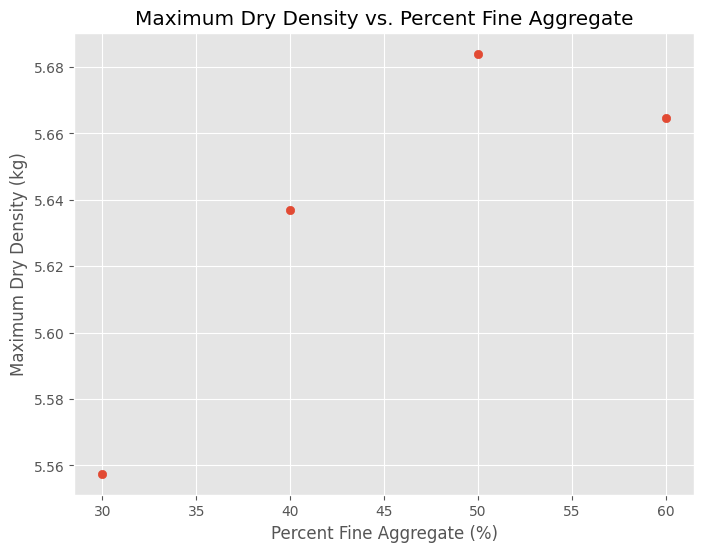

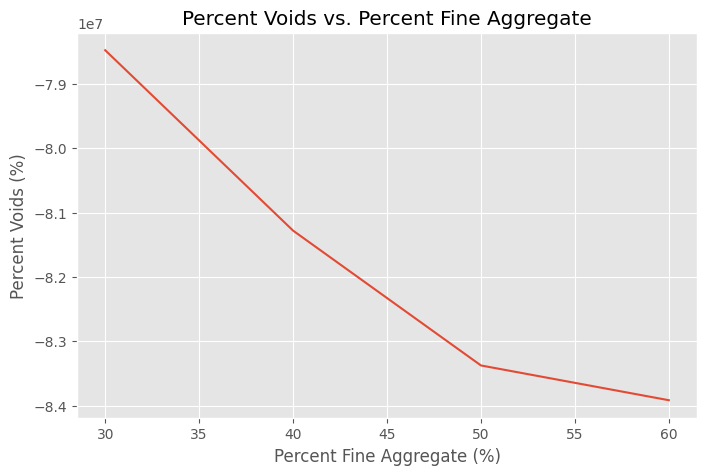

In [300]:
df_table1["Average Wt. of container and blend (kg)"] = df_table1[['Wt. of container and blend (kg)  (sample1)', 'Wt. of container and blend (kg)  (sample2)']].mean(axis=1)
df_table1["Wt. of blend (kg)"] = df_table1["Average Wt. of container and blend (kg)"] - container_weight

df_table1["Bulk Dry Density"] = df_table1["Wt. of blend (kg)"] / container_volume * 1000

specific_gravity_fine = 2.12
specific_gravity_coarse = 2.39

df_table1["Theoretical Density (kg/m3)"] = df_table1["Percent FA (%)"].apply(calculate_theoretical_density)

water_density = 998.2  # kg/m³
df_table1["Percent Voids (%)"] = 100 * (df_table1["Theoretical Density (kg/m3)"] - df_table1["Bulk Dry Density"]) / df_table1["Theoretical Density (kg/m3)"]

df_table1["Average Wt. of container and blend (kg)"] = df_table1[['Wt. of container and blend (kg)  (sample1)', 'Wt. of container and blend (kg)  (sample2)']].mean(axis=1)
df_table1["Wt. of blend (kg)"] = df_table1["Average Wt. of container and blend (kg)"] - df_table1["Weight of FA (kg)"]


df_table3["Volume of sample (cm3) [B-C]"] = calculate_volume(df_table3["Wt. of SSD sample in air (g) [B]"], df_table3["Wt. of SSD sample in water (g) [C]"])
df_table3["Wt. of water (g) [B-A]"] = calculate_water_weight(df_table3["Wt. of SSD sample in air (g) [B]"], df_table3["Wt. of dry sample (g) [A]"])
df_table3["Water absorption (%) [(B-A)/A]*100"] = calculate_water_absorption(df_table3["Wt. of water (g) [B-A]"], df_table3["Wt. of dry sample (g) [A]"])

plot_maximum_dry_density(df_table1)
plot_void_percentage(df_table1)